In [3]:
%store -r bucket

In [4]:
%store -r data
data.head()

,device_id,motor_peak_mA,battery
timestamp,,,
2020-02-22 23:59:59,7517a917b42450470661cec1bd4654f8,1335,73
2020-02-22 23:59:59,8e4a851ed2317a249a0903f29d894361,1577,73
2020-02-22 23:59:59,572ddf9d82d5675ed2db832081b70103,1585,73
2020-02-22 23:59:59,b17bbc29ce61265a6212c689a597d4d8,0,73
2020-02-22 23:59:59,19d3c55b134ab7780d2b711211b7cf7c,1286,73


In [ ]:
# Exploratory Data Analysis

In [5]:
data.groupby("device_id").count().head()

,motor_peak_mA,battery
device_id,,
0001495ce5f079703599a94c32dab2b0,124,124
00134c004e33e830e5dbce3355a485b9,121,121
0019400877c460d9b66298649162179d,124,124
001e70f66ab7a9d4bd6a5a074f288f0f,109,109
00211448f7814aea70f2c8d5aebd2aa9,116,116


In [6]:
device_pos = 1
sample_device_id = data.iloc[device_pos]["device_id"]
sample_device_id

'8e4a851ed2317a249a0903f29d894361'

In [8]:
sample_data = data[data["device_id"] == sample_device_id]

In [9]:
motor = sample_data["motor_peak_mA"]

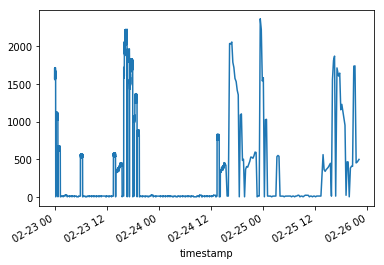

In [11]:
from matplotlib import pyplot
motor.plot()

# Time Series Resampling

In [14]:
hourly = data[data["motor_peak_mA"] > 0]
hourly = (hourly.groupby("device_id")
          .motor_peak_mA
          .resample("H")
          .max())

In [15]:
hourly

device_id                         timestamp          
0001495ce5f079703599a94c32dab2b0  2020-02-24 15:00:00    1843.0
                                  2020-02-24 16:00:00    1906.0
                                  2020-02-24 17:00:00    1909.0
                                  2020-02-24 18:00:00    1540.0
                                  2020-02-24 19:00:00     476.0
                                                          ...  
fffaee1fbb9c96703850f64d3262e843  2020-02-25 17:00:00    2211.0
                                  2020-02-25 18:00:00    1663.0
                                  2020-02-25 19:00:00     841.0
                                  2020-02-25 20:00:00     650.0
                                  2020-02-25 21:00:00     741.0
Name: motor_peak_mA, Length: 529940, dtype: float64

In [16]:
hourly = hourly.reset_index().set_index("timestamp")

In [17]:
hourly

,device_id,motor_peak_mA
timestamp,,
2020-02-24 15:00:00,0001495ce5f079703599a94c32dab2b0,1843.0
2020-02-24 16:00:00,0001495ce5f079703599a94c32dab2b0,1906.0
2020-02-24 17:00:00,0001495ce5f079703599a94c32dab2b0,1909.0
2020-02-24 18:00:00,0001495ce5f079703599a94c32dab2b0,1540.0
2020-02-24 19:00:00,0001495ce5f079703599a94c32dab2b0,476.0
...,...,...
2020-02-25 17:00:00,fffaee1fbb9c96703850f64d3262e843,2211.0
2020-02-25 18:00:00,fffaee1fbb9c96703850f64d3262e843,1663.0
2020-02-25 19:00:00,fffaee1fbb9c96703850f64d3262e843,841.0


In [18]:
hsample = hourly[hourly["device_id"] == sample_device_id]

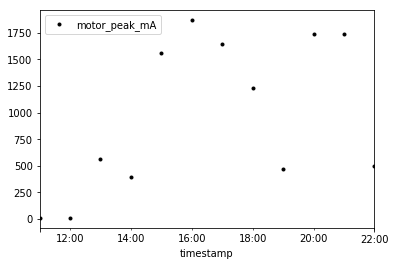

In [19]:
hsample.tail(12).plot(style="k.")

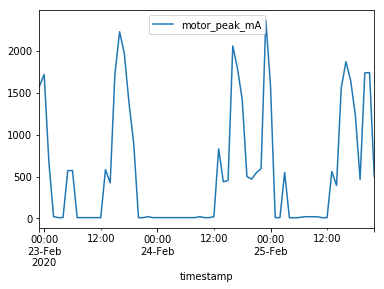

In [20]:
hsample.plot()

In [21]:
## Cross Validation

In [24]:
import pandas as pd

In [22]:
last_time = hourly.tail(1).index[0]
last_time

Timestamp('2020-02-25 21:00:00')

In [25]:
cut_time = last_time - pd.Timedelta('3 hour')
cut_time

Timestamp('2020-02-25 18:00:00')

In [26]:
train_set = hourly.loc[hourly.index <= cut_time]
train_set.tail()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 14:00:00,fffaee1fbb9c96703850f64d3262e843,672.0
2020-02-25 15:00:00,fffaee1fbb9c96703850f64d3262e843,707.0
2020-02-25 16:00:00,fffaee1fbb9c96703850f64d3262e843,2286.0
2020-02-25 17:00:00,fffaee1fbb9c96703850f64d3262e843,2211.0
2020-02-25 18:00:00,fffaee1fbb9c96703850f64d3262e843,1663.0


In [27]:
test_set = hourly.loc[hourly.index > cut_time]
test_set.head()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 19:00:00,0001495ce5f079703599a94c32dab2b0,688.0
2020-02-25 20:00:00,0001495ce5f079703599a94c32dab2b0,440.0
2020-02-25 21:00:00,0001495ce5f079703599a94c32dab2b0,550.0
2020-02-25 19:00:00,00134c004e33e830e5dbce3355a485b9,667.0
2020-02-25 20:00:00,00134c004e33e830e5dbce3355a485b9,454.0


In [28]:
sample_train = train_set[train_set["device_id"] == sample_device_id]
sample_test = test_set[test_set["device_id"] == sample_device_id]

In [29]:
sample_train.tail()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 14:00:00,8e4a851ed2317a249a0903f29d894361,394.0
2020-02-25 15:00:00,8e4a851ed2317a249a0903f29d894361,1557.0
2020-02-25 16:00:00,8e4a851ed2317a249a0903f29d894361,1869.0
2020-02-25 17:00:00,8e4a851ed2317a249a0903f29d894361,1643.0
2020-02-25 18:00:00,8e4a851ed2317a249a0903f29d894361,1228.0


In [30]:
sample_test.head()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 19:00:00,8e4a851ed2317a249a0903f29d894361,465.0
2020-02-25 20:00:00,8e4a851ed2317a249a0903f29d894361,1735.0
2020-02-25 21:00:00,8e4a851ed2317a249a0903f29d894361,1739.0
2020-02-25 22:00:00,8e4a851ed2317a249a0903f29d894361,497.0


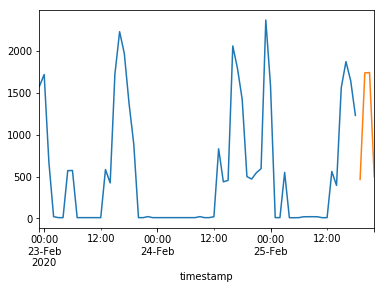

In [34]:
from matplotlib import pyplot

ax = sample_train["motor_peak_mA"].plot(label="train")
sample_test["motor_peak_mA"].plot(ax=ax,label="test")

## DeepAR Training

Convert the data from pandas DataFrame to the expected JSON Lines:

In [38]:
import json
import math

def df_to_tss(dataframe):
    df = dataframe.copy()
    df["timeindex"] = df.index
    cats = {}
    tss = {}
    for index, row in df.iterrows():
        target = row["motor_peak_mA"]
        if not(math.isnan(target)):
            identity = row["device_id"]
            cat = cats.get(identity)
            if not cat:
                cat = len(cats)
                start = str(row["timeindex"])
                ts = {
                    "start": start,
                    "cat": [cat],
                    "target": [],
                }
                cats[identity] = cat
                tss[cat] = ts
            ts = tss.get(cat)
            ts["target"].append(target)
    return tss

def tss_to_jsonl(tss):  
    result = ""
    for key, value in tss.items():
        jsonll = json.dumps(value)
        result += jsonll
        result += "\n"
    return result[:-1]

def df_to_jsonl(dataframe):
    return tss_to_jsonl(df_to_tss(dataframe))

In [39]:
import time
start = time.time()
jsonl = df_to_jsonl(train_set.head(100))
elapsed = time.time() - start
print(elapsed)
print(jsonl)

0.020414113998413086
{"start": "2020-02-24 15:00:00", "cat": [0], "target": [1843.0]}
{"start": "2020-02-24 16:00:00", "cat": [1], "target": [2171.0, 1949.0, 1769.0, 871.0, 477.0, 529.0, 570.0, 2202.0, 1483.0, 734.0, 10.0, 532.0, 817.0, 519.0, 617.0, 2146.0, 1870.0, 1397.0]}
{"start": "2020-02-24 15:00:00", "cat": [2], "target": [10.0, 2145.0, 1772.0, 1392.0, 909.0, 556.0, 658.0, 680.0, 2354.0, 1151.0, 21.0, 21.0, 10.0, 21.0, 21.0, 20.0, 10.0, 10.0, 21.0, 9.0, 20.0, 10.0, 681.0, 553.0, 608.0, 2014.0, 1685.0, 1518.0]}
{"start": "2020-02-24 15:00:00", "cat": [3], "target": [1580.0, 1997.0, 1735.0, 1202.0, 952.0, 436.0, 648.0, 694.0, 2252.0, 1345.0, 621.0, 10.0, 9.0, 10.0, 562.0]}


In [40]:
import time
start = time.time()

train_tss = df_to_tss(train_set)
train_jsonl = tss_to_jsonl(train_tss)

test_tss = df_to_tss(test_set)
test_jsonl = tss_to_jsonl(test_tss)

elapsed = time.time() - start
print(elapsed)

73.8278374671936


In [41]:
import pathlib

prefix = "mt-motor-maintenance"
input_path = "./{}/input".format(prefix)

train_path = "{}/train.json".format(input_path)
test_path = "{}/test.json".format(input_path)
(train_path,test_path)

('./mt-motor-maintenance/input/train.json',
 './mt-motor-maintenance/input/test.json')

In [42]:
import shutil

shutil.rmtree(input_path, ignore_errors=True)
pathlib.Path(input_path).mkdir(parents=True, exist_ok=True)

In [43]:
with open(train_path, "w") as text_file:
    print(train_jsonl, file=text_file)

with open(test_path, "w") as text_file:
    print(test_jsonl, file=text_file)

In [44]:
! ls -liah "{input_path}/"

total 5.2M
393221 drwxrwxr-x 2 ec2-user ec2-user 4.0K May 13 17:22 .
393220 drwxrwxr-x 3 ec2-user ec2-user 4.0K May 13 17:22 ..
393223 -rw-rw-r-- 1 ec2-user ec2-user 1.4M May 13 17:22 test.json
393222 -rw-rw-r-- 1 ec2-user ec2-user 3.8M May 13 17:22 train.json


In [45]:
%store -r bucket

In [46]:
!aws s3 sync "{input_path}/" "s3://{bucket}/{prefix}/" --delete

upload: mt-motor-maintenance/input/test.json to s3://mt-ml-workshop-wzejasmw/mt-motor-maintenance/test.json
upload: mt-motor-maintenance/input/train.json to s3://mt-ml-workshop-wzejasmw/mt-motor-maintenance/train.json


In [47]:
!aws s3 ls "s3://{bucket}/{prefix}/" 

2020-05-13 17:23:18    1373977 test.json
2020-05-13 17:23:18    3962421 train.json


In [48]:
dar_input = {
    "train": "s3://{}/{}/train.json".format(bucket,prefix),
    "test": "s3://{}/{}/test.json".format(bucket,prefix)
}
dar_input

{'train': 's3://mt-ml-workshop-wzejasmw/mt-motor-maintenance/train.json',
 'test': 's3://mt-ml-workshop-wzejasmw/mt-motor-maintenance/test.json'}

In [49]:
train_instance_type='ml.c5.2xlarge' #Estimated Training Time: 10m

In [50]:
import boto3
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri

dar_image_name = get_image_uri(boto3.Session().region_name, 'forecasting-deepar')
dar_image_name

'224300973850.dkr.ecr.eu-west-1.amazonaws.com/forecasting-deepar:1'

In [51]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

dar_estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=dar_image_name,
    role=role,
    train_instance_count=1,
    train_instance_type=train_instance_type,
    base_job_name=prefix,
    output_path="s3://{}/{}/output/".format(bucket,prefix)
)

In [53]:
freq = 'H'
prediction_length = 4
context_length = 12

In [54]:
dar_hyperparameters = {
    "time_freq": freq,
    "context_length": str(context_length),
    "prediction_length": str(prediction_length),
    "num_cells": "40",
    "num_layers": "3",
    "likelihood": "gaussian",
    "epochs": "20",
    "mini_batch_size": "32",
    "learning_rate": "0.001",
    "dropout_rate": "0.05",
    "early_stopping_patience": "10",
    "cardinality": "auto",
    "num_dynamic_feat":"ignore"
}
dar_estimator.set_hyperparameters(**dar_hyperparameters)

In [56]:
dar_estimator.fit(inputs=dar_input)

2020-05-13 18:12:10 Starting - Starting the training job...
2020-05-13 18:12:11 Starting - Launching requested ML instances......
2020-05-13 18:13:37 Starting - Preparing the instances for training...
2020-05-13 18:14:11 Downloading - Downloading input data...
2020-05-13 18:14:28 Training - Downloading the training image.Arguments: train
[05/13/2020 18:14:46 INFO 140669025912640] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[05/13/2020 18:14:46 IN


2020-05-13 18:14:44 Training - Training image download completed. Training in progress.[05/13/2020 18:14:55 INFO 140669025912640] Epoch[0] Batch[235] avg_epoch_loss=15.042520
[05/13/2020 18:14:55 INFO 140669025912640] #quality_metric: host=algo-1, epoch=0, batch=235 train loss <loss>=8.35049571991
[05/13/2020 18:14:55 INFO 140669025912640] Epoch[0] Batch [235]#011Speed: 1035.50 samples/sec#011loss=8.350496
[05/13/2020 18:14:55 INFO 140669025912640] Epoch[0] Batch[240] avg_epoch_loss=14.911769
[05/13/2020 18:14:55 INFO 140669025912640] #quality_metric: host=algo-1, epoch=0, batch=240 train loss <loss>=8.74035110474
[05/13/2020 18:14:55 INFO 140669025912640] Epoch[0] Batch [240]#011Speed: 1595.12 samples/sec#011loss=8.740351
[05/13/2020 18:14:55 INFO 140669025912640] Epoch[0] Batch[245] avg_epoch_loss=14.786632
[05/13/2020 18:14:55 INFO 140669025912640] #quality_metric: host=algo-1, epoch=0, batch=245 train loss <loss>=8.75500850677
[05/13/2020 18:14:55 INFO 140669025912640] Epoch[0] Ba

[05/13/2020 18:15:10 INFO 140669025912640] Epoch[1] Batch[250] avg_epoch_loss=7.787807
[05/13/2020 18:15:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=1, batch=250 train loss <loss>=7.47085676193
[05/13/2020 18:15:10 INFO 140669025912640] Epoch[1] Batch [250]#011Speed: 1474.07 samples/sec#011loss=7.470857
[05/13/2020 18:15:10 INFO 140669025912640] Epoch[1] Batch[255] avg_epoch_loss=7.786323
[05/13/2020 18:15:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=1, batch=255 train loss <loss>=7.71181545258
[05/13/2020 18:15:10 INFO 140669025912640] Epoch[1] Batch [255]#011Speed: 1062.86 samples/sec#011loss=7.711815
[05/13/2020 18:15:10 INFO 140669025912640] Epoch[1] Batch[260] avg_epoch_loss=7.775825
[05/13/2020 18:15:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=1, batch=260 train loss <loss>=7.23834028244
[05/13/2020 18:15:10 INFO 140669025912640] Epoch[1] Batch [260]#011Speed: 1668.53 samples/sec#011loss=7.238340
[05/13/2020 18:15:10 INFO 14066902

[05/13/2020 18:15:20 INFO 140669025912640] Epoch[2] Batch[75] avg_epoch_loss=5.944491
[05/13/2020 18:15:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=2, batch=75 train loss <loss>=5.84344940186
[05/13/2020 18:15:20 INFO 140669025912640] Epoch[2] Batch [75]#011Speed: 1019.93 samples/sec#011loss=5.843449
[05/13/2020 18:15:20 INFO 140669025912640] Epoch[2] Batch[80] avg_epoch_loss=5.938355
[05/13/2020 18:15:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=2, batch=80 train loss <loss>=5.84509382248
[05/13/2020 18:15:20 INFO 140669025912640] Epoch[2] Batch [80]#011Speed: 1675.99 samples/sec#011loss=5.845094
[05/13/2020 18:15:20 INFO 140669025912640] Epoch[2] Batch[85] avg_epoch_loss=5.926377
[05/13/2020 18:15:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=2, batch=85 train loss <loss>=5.73232707977
[05/13/2020 18:15:20 INFO 140669025912640] Epoch[2] Batch [85]#011Speed: 982.10 samples/sec#011loss=5.732327
[05/13/2020 18:15:20 INFO 140669025912640] E

[05/13/2020 18:15:30 INFO 140669025912640] Epoch[2] Batch[470] avg_epoch_loss=5.835665
[05/13/2020 18:15:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=2, batch=470 train loss <loss>=5.76646385193
[05/13/2020 18:15:30 INFO 140669025912640] Epoch[2] Batch [470]#011Speed: 1035.95 samples/sec#011loss=5.766464
[05/13/2020 18:15:30 INFO 140669025912640] Epoch[2] Batch[475] avg_epoch_loss=5.833891
[05/13/2020 18:15:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=2, batch=475 train loss <loss>=5.66685285568
[05/13/2020 18:15:30 INFO 140669025912640] Epoch[2] Batch [475]#011Speed: 1477.19 samples/sec#011loss=5.666853
[05/13/2020 18:15:30 INFO 140669025912640] Epoch[2] Batch[480] avg_epoch_loss=5.833164
[05/13/2020 18:15:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=2, batch=480 train loss <loss>=5.76390743256
[05/13/2020 18:15:30 INFO 140669025912640] Epoch[2] Batch [480]#011Speed: 1027.91 samples/sec#011loss=5.763907
[05/13/2020 18:15:30 INFO 14066902

[05/13/2020 18:15:40 INFO 140669025912640] Epoch[3] Batch[295] avg_epoch_loss=5.673041
[05/13/2020 18:15:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=3, batch=295 train loss <loss>=5.55937099457
[05/13/2020 18:15:40 INFO 140669025912640] Epoch[3] Batch [295]#011Speed: 1448.53 samples/sec#011loss=5.559371
[05/13/2020 18:15:40 INFO 140669025912640] Epoch[3] Batch[300] avg_epoch_loss=5.670436
[05/13/2020 18:15:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=3, batch=300 train loss <loss>=5.51618785858
[05/13/2020 18:15:40 INFO 140669025912640] Epoch[3] Batch [300]#011Speed: 1043.07 samples/sec#011loss=5.516188
[05/13/2020 18:15:40 INFO 140669025912640] Epoch[3] Batch[305] avg_epoch_loss=5.672020
[05/13/2020 18:15:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=3, batch=305 train loss <loss>=5.76740598679
[05/13/2020 18:15:40 INFO 140669025912640] Epoch[3] Batch [305]#011Speed: 1680.92 samples/sec#011loss=5.767406
[05/13/2020 18:15:40 INFO 14066902

[05/13/2020 18:15:50 INFO 140669025912640] Epoch[4] Batch[115] avg_epoch_loss=5.556308
[05/13/2020 18:15:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=4, batch=115 train loss <loss>=5.42589855194
[05/13/2020 18:15:50 INFO 140669025912640] Epoch[4] Batch [115]#011Speed: 1006.33 samples/sec#011loss=5.425899
[05/13/2020 18:15:50 INFO 140669025912640] Epoch[4] Batch[120] avg_epoch_loss=5.568110
[05/13/2020 18:15:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=4, batch=120 train loss <loss>=5.84192304611
[05/13/2020 18:15:50 INFO 140669025912640] Epoch[4] Batch [120]#011Speed: 1651.13 samples/sec#011loss=5.841923
[05/13/2020 18:15:50 INFO 140669025912640] Epoch[4] Batch[125] avg_epoch_loss=5.562941
[05/13/2020 18:15:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=4, batch=125 train loss <loss>=5.43784332275
[05/13/2020 18:15:50 INFO 140669025912640] Epoch[4] Batch [125]#011Speed: 1014.14 samples/sec#011loss=5.437843
[05/13/2020 18:15:50 INFO 14066902

[05/13/2020 18:16:00 INFO 140669025912640] Epoch[4] Batch[510] avg_epoch_loss=5.556386
[05/13/2020 18:16:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=4, batch=510 train loss <loss>=5.60768938065
[05/13/2020 18:16:00 INFO 140669025912640] Epoch[4] Batch [510]#011Speed: 1017.17 samples/sec#011loss=5.607689
[05/13/2020 18:16:00 INFO 140669025912640] Epoch[4] Batch[515] avg_epoch_loss=5.557000
[05/13/2020 18:16:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=4, batch=515 train loss <loss>=5.6197558403
[05/13/2020 18:16:00 INFO 140669025912640] Epoch[4] Batch [515]#011Speed: 1532.33 samples/sec#011loss=5.619756
[05/13/2020 18:16:00 INFO 140669025912640] Epoch[4] Batch[520] avg_epoch_loss=5.558225
[05/13/2020 18:16:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=4, batch=520 train loss <loss>=5.68464765549
[05/13/2020 18:16:00 INFO 140669025912640] Epoch[4] Batch [520]#011Speed: 1057.78 samples/sec#011loss=5.684648
[05/13/2020 18:16:00 INFO 140669025

[05/13/2020 18:16:10 INFO 140669025912640] Epoch[5] Batch[345] avg_epoch_loss=5.499592
[05/13/2020 18:16:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=5, batch=345 train loss <loss>=5.4356423378
[05/13/2020 18:16:10 INFO 140669025912640] Epoch[5] Batch [345]#011Speed: 1076.88 samples/sec#011loss=5.435642
[05/13/2020 18:16:10 INFO 140669025912640] Epoch[5] Batch[350] avg_epoch_loss=5.501517
[05/13/2020 18:16:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=5, batch=350 train loss <loss>=5.63472909927
[05/13/2020 18:16:10 INFO 140669025912640] Epoch[5] Batch [350]#011Speed: 1500.74 samples/sec#011loss=5.634729
[05/13/2020 18:16:10 INFO 140669025912640] Epoch[5] Batch[355] avg_epoch_loss=5.497892
[05/13/2020 18:16:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=5, batch=355 train loss <loss>=5.24341526031
[05/13/2020 18:16:10 INFO 140669025912640] Epoch[5] Batch [355]#011Speed: 1028.63 samples/sec#011loss=5.243415
[05/13/2020 18:16:10 INFO 140669025

[05/13/2020 18:16:20 INFO 140669025912640] Epoch[6] Batch[165] avg_epoch_loss=5.409524
[05/13/2020 18:16:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=6, batch=165 train loss <loss>=5.29861822128
[05/13/2020 18:16:20 INFO 140669025912640] Epoch[6] Batch [165]#011Speed: 1063.66 samples/sec#011loss=5.298618
[05/13/2020 18:16:20 INFO 140669025912640] Epoch[6] Batch[170] avg_epoch_loss=5.413589
[05/13/2020 18:16:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=6, batch=170 train loss <loss>=5.54853496552
[05/13/2020 18:16:20 INFO 140669025912640] Epoch[6] Batch [170]#011Speed: 1606.97 samples/sec#011loss=5.548535
[05/13/2020 18:16:20 INFO 140669025912640] Epoch[6] Batch[175] avg_epoch_loss=5.421214
[05/13/2020 18:16:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=6, batch=175 train loss <loss>=5.68200931549
[05/13/2020 18:16:20 INFO 140669025912640] Epoch[6] Batch [175]#011Speed: 1016.90 samples/sec#011loss=5.682009
[05/13/2020 18:16:20 INFO 14066902

[05/13/2020 18:16:30 INFO 140669025912640] Epoch[6] Batch[570] avg_epoch_loss=5.439244
[05/13/2020 18:16:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=6, batch=570 train loss <loss>=5.52857465744
[05/13/2020 18:16:30 INFO 140669025912640] Epoch[6] Batch [570]#011Speed: 1527.23 samples/sec#011loss=5.528575
[05/13/2020 18:16:30 INFO 140669025912640] Epoch[6] Batch[575] avg_epoch_loss=5.440173
[05/13/2020 18:16:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=6, batch=575 train loss <loss>=5.5463013649
[05/13/2020 18:16:30 INFO 140669025912640] Epoch[6] Batch [575]#011Speed: 1679.03 samples/sec#011loss=5.546301
[05/13/2020 18:16:30 INFO 140669025912640] processed a total of 18416 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 14221.63701057434, "sum": 14221.63701057434, "min": 14221.63701057434}}, "EndTime": 1589393790.644695, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589393776.423001}


[05/13/2020 18:16:40 INFO 140669025912640] Epoch[7] Batch[395] avg_epoch_loss=5.425269
[05/13/2020 18:16:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=7, batch=395 train loss <loss>=5.45177221298
[05/13/2020 18:16:40 INFO 140669025912640] Epoch[7] Batch [395]#011Speed: 1100.56 samples/sec#011loss=5.451772
[05/13/2020 18:16:40 INFO 140669025912640] Epoch[7] Batch[400] avg_epoch_loss=5.424265
[05/13/2020 18:16:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=7, batch=400 train loss <loss>=5.34477443695
[05/13/2020 18:16:40 INFO 140669025912640] Epoch[7] Batch [400]#011Speed: 1585.84 samples/sec#011loss=5.344774
[05/13/2020 18:16:40 INFO 140669025912640] Epoch[7] Batch[405] avg_epoch_loss=5.423712
[05/13/2020 18:16:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=7, batch=405 train loss <loss>=5.3793466568
[05/13/2020 18:16:40 INFO 140669025912640] Epoch[7] Batch [405]#011Speed: 1011.88 samples/sec#011loss=5.379347
[05/13/2020 18:16:40 INFO 140669025

[05/13/2020 18:16:50 INFO 140669025912640] Epoch[8] Batch[220] avg_epoch_loss=5.391924
[05/13/2020 18:16:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=8, batch=220 train loss <loss>=5.61462631226
[05/13/2020 18:16:50 INFO 140669025912640] Epoch[8] Batch [220]#011Speed: 1076.89 samples/sec#011loss=5.614626
[05/13/2020 18:16:50 INFO 140669025912640] Epoch[8] Batch[225] avg_epoch_loss=5.389052
[05/13/2020 18:16:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=8, batch=225 train loss <loss>=5.26209573746
[05/13/2020 18:16:50 INFO 140669025912640] Epoch[8] Batch [225]#011Speed: 1655.15 samples/sec#011loss=5.262096
[05/13/2020 18:16:50 INFO 140669025912640] Epoch[8] Batch[230] avg_epoch_loss=5.389046
[05/13/2020 18:16:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=8, batch=230 train loss <loss>=5.38875513077
[05/13/2020 18:16:50 INFO 140669025912640] Epoch[8] Batch [230]#011Speed: 1067.22 samples/sec#011loss=5.388755
[05/13/2020 18:16:50 INFO 14066902

[05/13/2020 18:17:00 INFO 140669025912640] Epoch[9] Batch[45] avg_epoch_loss=5.312605
[05/13/2020 18:17:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=9, batch=45 train loss <loss>=5.64178352356
[05/13/2020 18:17:00 INFO 140669025912640] Epoch[9] Batch [45]#011Speed: 1114.54 samples/sec#011loss=5.641784
[05/13/2020 18:17:00 INFO 140669025912640] Epoch[9] Batch[50] avg_epoch_loss=5.288174
[05/13/2020 18:17:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=9, batch=50 train loss <loss>=5.06340904236
[05/13/2020 18:17:00 INFO 140669025912640] Epoch[9] Batch [50]#011Speed: 1653.56 samples/sec#011loss=5.063409
[05/13/2020 18:17:00 INFO 140669025912640] Epoch[9] Batch[55] avg_epoch_loss=5.303615
[05/13/2020 18:17:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=9, batch=55 train loss <loss>=5.46111288071
[05/13/2020 18:17:00 INFO 140669025912640] Epoch[9] Batch [55]#011Speed: 1101.65 samples/sec#011loss=5.461113
[05/13/2020 18:17:00 INFO 140669025912640] 

[05/13/2020 18:17:10 INFO 140669025912640] Epoch[9] Batch[450] avg_epoch_loss=5.336951
[05/13/2020 18:17:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=9, batch=450 train loss <loss>=5.45612239838
[05/13/2020 18:17:10 INFO 140669025912640] Epoch[9] Batch [450]#011Speed: 1669.22 samples/sec#011loss=5.456122
[05/13/2020 18:17:10 INFO 140669025912640] Epoch[9] Batch[455] avg_epoch_loss=5.339689
[05/13/2020 18:17:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=9, batch=455 train loss <loss>=5.58666667938
[05/13/2020 18:17:10 INFO 140669025912640] Epoch[9] Batch [455]#011Speed: 1053.25 samples/sec#011loss=5.586667
[05/13/2020 18:17:10 INFO 140669025912640] Epoch[9] Batch[460] avg_epoch_loss=5.340719
[05/13/2020 18:17:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=9, batch=460 train loss <loss>=5.43457279205
[05/13/2020 18:17:10 INFO 140669025912640] Epoch[9] Batch [460]#011Speed: 1652.53 samples/sec#011loss=5.434573
[05/13/2020 18:17:10 INFO 14066902

[05/13/2020 18:17:20 INFO 140669025912640] Epoch[10] Batch[275] avg_epoch_loss=5.367797
[05/13/2020 18:17:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=10, batch=275 train loss <loss>=5.50318927765
[05/13/2020 18:17:20 INFO 140669025912640] Epoch[10] Batch [275]#011Speed: 1059.17 samples/sec#011loss=5.503189
[05/13/2020 18:17:20 INFO 140669025912640] Epoch[10] Batch[280] avg_epoch_loss=5.366697
[05/13/2020 18:17:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=10, batch=280 train loss <loss>=5.30597763062
[05/13/2020 18:17:20 INFO 140669025912640] Epoch[10] Batch [280]#011Speed: 1682.60 samples/sec#011loss=5.305978
[05/13/2020 18:17:20 INFO 140669025912640] Epoch[10] Batch[285] avg_epoch_loss=5.357498
[05/13/2020 18:17:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=10, batch=285 train loss <loss>=4.84050760269
[05/13/2020 18:17:20 INFO 140669025912640] Epoch[10] Batch [285]#011Speed: 1048.52 samples/sec#011loss=4.840508
[05/13/2020 18:17:20 INFO

[05/13/2020 18:17:30 INFO 140669025912640] Epoch[11] Batch[105] avg_epoch_loss=5.293285
[05/13/2020 18:17:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=11, batch=105 train loss <loss>=5.44913282394
[05/13/2020 18:17:30 INFO 140669025912640] Epoch[11] Batch [105]#011Speed: 1035.15 samples/sec#011loss=5.449133
[05/13/2020 18:17:30 INFO 140669025912640] Epoch[11] Batch[110] avg_epoch_loss=5.291201
[05/13/2020 18:17:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=11, batch=110 train loss <loss>=5.24700698853
[05/13/2020 18:17:30 INFO 140669025912640] Epoch[11] Batch [110]#011Speed: 1643.47 samples/sec#011loss=5.247007
[05/13/2020 18:17:30 INFO 140669025912640] Epoch[11] Batch[115] avg_epoch_loss=5.314130
[05/13/2020 18:17:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=11, batch=115 train loss <loss>=5.82315244675
[05/13/2020 18:17:30 INFO 140669025912640] Epoch[11] Batch [115]#011Speed: 1082.60 samples/sec#011loss=5.823152
[05/13/2020 18:17:30 INFO

[05/13/2020 18:17:40 INFO 140669025912640] Epoch[11] Batch[505] avg_epoch_loss=5.317344
[05/13/2020 18:17:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=11, batch=505 train loss <loss>=5.50107593536
[05/13/2020 18:17:40 INFO 140669025912640] Epoch[11] Batch [505]#011Speed: 1103.12 samples/sec#011loss=5.501076
[05/13/2020 18:17:40 INFO 140669025912640] Epoch[11] Batch[510] avg_epoch_loss=5.315336
[05/13/2020 18:17:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=11, batch=510 train loss <loss>=5.11209974289
[05/13/2020 18:17:40 INFO 140669025912640] Epoch[11] Batch [510]#011Speed: 1586.19 samples/sec#011loss=5.112100
[05/13/2020 18:17:40 INFO 140669025912640] Epoch[11] Batch[515] avg_epoch_loss=5.314981
[05/13/2020 18:17:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=11, batch=515 train loss <loss>=5.27866258621
[05/13/2020 18:17:40 INFO 140669025912640] Epoch[11] Batch [515]#011Speed: 1630.94 samples/sec#011loss=5.278663
[05/13/2020 18:17:41 INFO

[05/13/2020 18:17:50 INFO 140669025912640] Epoch[12] Batch[335] avg_epoch_loss=5.298413
[05/13/2020 18:17:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=12, batch=335 train loss <loss>=5.24203367233
[05/13/2020 18:17:50 INFO 140669025912640] Epoch[12] Batch [335]#011Speed: 1091.75 samples/sec#011loss=5.242034
[05/13/2020 18:17:50 INFO 140669025912640] Epoch[12] Batch[340] avg_epoch_loss=5.299403
[05/13/2020 18:17:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=12, batch=340 train loss <loss>=5.36594820023
[05/13/2020 18:17:50 INFO 140669025912640] Epoch[12] Batch [340]#011Speed: 1651.99 samples/sec#011loss=5.365948
[05/13/2020 18:17:50 INFO 140669025912640] Epoch[12] Batch[345] avg_epoch_loss=5.297972
[05/13/2020 18:17:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=12, batch=345 train loss <loss>=5.2003862381
[05/13/2020 18:17:50 INFO 140669025912640] Epoch[12] Batch [345]#011Speed: 1112.65 samples/sec#011loss=5.200386
[05/13/2020 18:17:51 INFO 

[05/13/2020 18:18:00 INFO 140669025912640] Epoch[13] Batch[165] avg_epoch_loss=5.223616
[05/13/2020 18:18:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=13, batch=165 train loss <loss>=5.42872781754
[05/13/2020 18:18:00 INFO 140669025912640] Epoch[13] Batch [165]#011Speed: 1011.31 samples/sec#011loss=5.428728
[05/13/2020 18:18:00 INFO 140669025912640] Epoch[13] Batch[170] avg_epoch_loss=5.218146
[05/13/2020 18:18:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=13, batch=170 train loss <loss>=5.03655529022
[05/13/2020 18:18:00 INFO 140669025912640] Epoch[13] Batch [170]#011Speed: 1509.31 samples/sec#011loss=5.036555
[05/13/2020 18:18:00 INFO 140669025912640] Epoch[13] Batch[175] avg_epoch_loss=5.216487
[05/13/2020 18:18:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=13, batch=175 train loss <loss>=5.15975799561
[05/13/2020 18:18:00 INFO 140669025912640] Epoch[13] Batch [175]#011Speed: 1135.86 samples/sec#011loss=5.159758
[05/13/2020 18:18:00 INFO

[05/13/2020 18:18:10 INFO 140669025912640] Epoch[13] Batch[565] avg_epoch_loss=5.290393
[05/13/2020 18:18:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=13, batch=565 train loss <loss>=5.19291982651
[05/13/2020 18:18:10 INFO 140669025912640] Epoch[13] Batch [565]#011Speed: 1286.71 samples/sec#011loss=5.192920
[05/13/2020 18:18:10 INFO 140669025912640] processed a total of 18171 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 14127.385139465332, "sum": 14127.385139465332, "min": 14127.385139465332}}, "EndTime": 1589393890.647331, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589393876.519888}

[05/13/2020 18:18:10 INFO 140669025912640] #throughput_metric: host=algo-1, train throughput=1286.21664737 records/second
[05/13/2020 18:18:10 INFO 140669025912640] #progress_metric: host=algo-1, completed 70 % of epochs
[05/13/2020 18:18:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=13, train loss

[05/13/2020 18:18:20 INFO 140669025912640] Epoch[14] Batch[405] avg_epoch_loss=5.256066
[05/13/2020 18:18:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=14, batch=405 train loss <loss>=5.22486600876
[05/13/2020 18:18:20 INFO 140669025912640] Epoch[14] Batch [405]#011Speed: 1020.84 samples/sec#011loss=5.224866
[05/13/2020 18:18:20 INFO 140669025912640] Epoch[14] Batch[410] avg_epoch_loss=5.256533
[05/13/2020 18:18:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=14, batch=410 train loss <loss>=5.29452896118
[05/13/2020 18:18:20 INFO 140669025912640] Epoch[14] Batch [410]#011Speed: 1684.92 samples/sec#011loss=5.294529
[05/13/2020 18:18:20 INFO 140669025912640] Epoch[14] Batch[415] avg_epoch_loss=5.256442
[05/13/2020 18:18:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=14, batch=415 train loss <loss>=5.24890756607
[05/13/2020 18:18:20 INFO 140669025912640] Epoch[14] Batch [415]#011Speed: 1064.52 samples/sec#011loss=5.248908
[05/13/2020 18:18:21 INFO

[05/13/2020 18:18:30 INFO 140669025912640] Epoch[15] Batch[225] avg_epoch_loss=5.262382
[05/13/2020 18:18:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=15, batch=225 train loss <loss>=5.177348423
[05/13/2020 18:18:30 INFO 140669025912640] Epoch[15] Batch [225]#011Speed: 1593.37 samples/sec#011loss=5.177348
[05/13/2020 18:18:30 INFO 140669025912640] Epoch[15] Batch[230] avg_epoch_loss=5.262730
[05/13/2020 18:18:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=15, batch=230 train loss <loss>=5.27845478058
[05/13/2020 18:18:30 INFO 140669025912640] Epoch[15] Batch [230]#011Speed: 1066.25 samples/sec#011loss=5.278455
[05/13/2020 18:18:30 INFO 140669025912640] Epoch[15] Batch[235] avg_epoch_loss=5.258645
[05/13/2020 18:18:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=15, batch=235 train loss <loss>=5.06989955902
[05/13/2020 18:18:30 INFO 140669025912640] Epoch[15] Batch [235]#011Speed: 1704.46 samples/sec#011loss=5.069900
[05/13/2020 18:18:31 INFO 1

[05/13/2020 18:18:40 INFO 140669025912640] Epoch[16] Batch[50] avg_epoch_loss=5.111640
[05/13/2020 18:18:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=16, batch=50 train loss <loss>=5.21962709427
[05/13/2020 18:18:40 INFO 140669025912640] Epoch[16] Batch [50]#011Speed: 1493.61 samples/sec#011loss=5.219627
[05/13/2020 18:18:40 INFO 140669025912640] Epoch[16] Batch[55] avg_epoch_loss=5.119304
[05/13/2020 18:18:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=16, batch=55 train loss <loss>=5.19747467041
[05/13/2020 18:18:40 INFO 140669025912640] Epoch[16] Batch [55]#011Speed: 1089.59 samples/sec#011loss=5.197475
[05/13/2020 18:18:40 INFO 140669025912640] Epoch[16] Batch[60] avg_epoch_loss=5.138641
[05/13/2020 18:18:40 INFO 140669025912640] #quality_metric: host=algo-1, epoch=16, batch=60 train loss <loss>=5.35521354675
[05/13/2020 18:18:40 INFO 140669025912640] Epoch[16] Batch [60]#011Speed: 1634.27 samples/sec#011loss=5.355214
[05/13/2020 18:18:41 INFO 14066902

[05/13/2020 18:18:50 INFO 140669025912640] Epoch[16] Batch[455] avg_epoch_loss=5.193548
[05/13/2020 18:18:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=16, batch=455 train loss <loss>=5.09839935303
[05/13/2020 18:18:50 INFO 140669025912640] Epoch[16] Batch [455]#011Speed: 1598.50 samples/sec#011loss=5.098399
[05/13/2020 18:18:50 INFO 140669025912640] Epoch[16] Batch[460] avg_epoch_loss=5.192563
[05/13/2020 18:18:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=16, batch=460 train loss <loss>=5.1027261734
[05/13/2020 18:18:50 INFO 140669025912640] Epoch[16] Batch [460]#011Speed: 1021.41 samples/sec#011loss=5.102726
[05/13/2020 18:18:50 INFO 140669025912640] Epoch[16] Batch[465] avg_epoch_loss=5.191487
[05/13/2020 18:18:50 INFO 140669025912640] #quality_metric: host=algo-1, epoch=16, batch=465 train loss <loss>=5.09226360321
[05/13/2020 18:18:50 INFO 140669025912640] Epoch[16] Batch [465]#011Speed: 1648.98 samples/sec#011loss=5.092264
[05/13/2020 18:18:51 INFO 

[05/13/2020 18:19:00 INFO 140669025912640] Epoch[17] Batch[280] avg_epoch_loss=5.180069
[05/13/2020 18:19:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=17, batch=280 train loss <loss>=4.99311447144
[05/13/2020 18:19:00 INFO 140669025912640] Epoch[17] Batch [280]#011Speed: 1096.29 samples/sec#011loss=4.993114
[05/13/2020 18:19:00 INFO 140669025912640] Epoch[17] Batch[285] avg_epoch_loss=5.175620
[05/13/2020 18:19:00 INFO 140669025912640] #quality_metric: host=algo-1, epoch=17, batch=285 train loss <loss>=4.92561721802
[05/13/2020 18:19:00 INFO 140669025912640] Epoch[17] Batch [285]#011Speed: 1629.51 samples/sec#011loss=4.925617
[05/13/2020 18:19:01 INFO 140669025912640] Epoch[17] Batch[290] avg_epoch_loss=5.179231
[05/13/2020 18:19:01 INFO 140669025912640] #quality_metric: host=algo-1, epoch=17, batch=290 train loss <loss>=5.38573188782
[05/13/2020 18:19:01 INFO 140669025912640] Epoch[17] Batch [290]#011Speed: 1100.71 samples/sec#011loss=5.385732
[05/13/2020 18:19:01 INFO

[05/13/2020 18:19:10 INFO 140669025912640] Epoch[18] Batch[105] avg_epoch_loss=5.177480
[05/13/2020 18:19:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=18, batch=105 train loss <loss>=5.11902751923
[05/13/2020 18:19:10 INFO 140669025912640] Epoch[18] Batch [105]#011Speed: 1666.75 samples/sec#011loss=5.119028
[05/13/2020 18:19:10 INFO 140669025912640] Epoch[18] Batch[110] avg_epoch_loss=5.176308
[05/13/2020 18:19:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=18, batch=110 train loss <loss>=5.15148067474
[05/13/2020 18:19:10 INFO 140669025912640] Epoch[18] Batch [110]#011Speed: 1050.95 samples/sec#011loss=5.151481
[05/13/2020 18:19:10 INFO 140669025912640] Epoch[18] Batch[115] avg_epoch_loss=5.177544
[05/13/2020 18:19:10 INFO 140669025912640] #quality_metric: host=algo-1, epoch=18, batch=115 train loss <loss>=5.20498018265
[05/13/2020 18:19:10 INFO 140669025912640] Epoch[18] Batch [115]#011Speed: 1625.31 samples/sec#011loss=5.204980
[05/13/2020 18:19:11 INFO

[05/13/2020 18:19:20 INFO 140669025912640] Epoch[18] Batch[510] avg_epoch_loss=5.156085
[05/13/2020 18:19:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=18, batch=510 train loss <loss>=5.30920877457
[05/13/2020 18:19:20 INFO 140669025912640] Epoch[18] Batch [510]#011Speed: 1641.08 samples/sec#011loss=5.309209
[05/13/2020 18:19:20 INFO 140669025912640] Epoch[18] Batch[515] avg_epoch_loss=5.156292
[05/13/2020 18:19:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=18, batch=515 train loss <loss>=5.1774020195
[05/13/2020 18:19:20 INFO 140669025912640] Epoch[18] Batch [515]#011Speed: 1113.17 samples/sec#011loss=5.177402
[05/13/2020 18:19:20 INFO 140669025912640] Epoch[18] Batch[520] avg_epoch_loss=5.156435
[05/13/2020 18:19:20 INFO 140669025912640] #quality_metric: host=algo-1, epoch=18, batch=520 train loss <loss>=5.1712562561
[05/13/2020 18:19:20 INFO 140669025912640] Epoch[18] Batch [520]#011Speed: 1676.02 samples/sec#011loss=5.171256
[05/13/2020 18:19:21 INFO 1

[05/13/2020 18:19:30 INFO 140669025912640] Epoch[19] Batch[330] avg_epoch_loss=5.120216
[05/13/2020 18:19:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=19, batch=330 train loss <loss>=5.12477779388
[05/13/2020 18:19:30 INFO 140669025912640] Epoch[19] Batch [330]#011Speed: 1115.74 samples/sec#011loss=5.124778
[05/13/2020 18:19:30 INFO 140669025912640] Epoch[19] Batch[335] avg_epoch_loss=5.117524
[05/13/2020 18:19:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=19, batch=335 train loss <loss>=4.93935432434
[05/13/2020 18:19:30 INFO 140669025912640] Epoch[19] Batch [335]#011Speed: 1631.59 samples/sec#011loss=4.939354
[05/13/2020 18:19:30 INFO 140669025912640] Epoch[19] Batch[340] avg_epoch_loss=5.115809
[05/13/2020 18:19:30 INFO 140669025912640] #quality_metric: host=algo-1, epoch=19, batch=340 train loss <loss>=5.00052051544
[05/13/2020 18:19:30 INFO 140669025912640] Epoch[19] Batch [340]#011Speed: 1082.88 samples/sec#011loss=5.000521
[05/13/2020 18:19:31 INFO

[05/13/2020 18:19:41 INFO 140669025912640] Number of test batches scored: 30
[05/13/2020 18:19:43 INFO 140669025912640] Number of test batches scored: 40
[05/13/2020 18:19:45 INFO 140669025912640] Number of test batches scored: 50
/opt/amazon/lib/python2.7/site-packages/numpy/ma/core.py:2785: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
#metrics {"Metrics": {"model.score.time": {"count": 1, "max": 8737.796068191528, "sum": 8737.796068191528, "min": 8737.796068191528}}, "EndTime": 1589393985.694467, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1589393976.95676}

[05/13/2020 18:19:45 INFO 140669025912640] #test_score (algo-1, RMSE): 1317.0583727
[05/13/2020 18:19:45 INFO 140669025912640] #test_score (algo-1, mean_absolute_QuantileLoss): 4666107.511838785
[05/13/2020 18:19:45 INFO 140669025912640] #test_score (algo-1, mean_wQuantileLoss): 1.5977839431682737
[05/13/2020 18:19:45 INFO 

In [58]:
dar_job_name = dar_estimator.latest_training_job.name
dar_job_name

'mt-motor-maintenance-2020-05-13-18-12-10-591'

# Random Cut Forest Training

In [93]:
anomalies = data[["motor_peak_mA"]]
anomalies = anomalies[anomalies["motor_peak_mA"] > 0]
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3079934 entries, 2020-02-22 23:59:59 to 2020-02-25 22:03:11
Data columns (total 1 columns):
 #   Column         Dtype
---  ------         -----
 0   motor_peak_mA  int64
dtypes: int64(1)
memory usage: 47.0 MB


In [94]:
from sklearn.model_selection import train_test_split

train_data, test_dataframe = train_test_split(anomalies, test_size=0.2)

In [95]:
test_data = test_dataframe.copy()
test_data["anomaly"] = test_data["motor_peak_mA"] > 4000
test_data["anomaly"] = test_data["anomaly"] | (test_data["motor_peak_mA"] > 50) & (test_data["motor_peak_mA"] < 200)
test_data["anomaly"] = test_data["anomaly"].astype(int) 
test_data.groupby("anomaly").count().head()

,motor_peak_mA
anomaly,
0,615677
1,310


In [96]:
test_data.describe()

,motor_peak_mA,anomaly
count,615987.000000,615987.000000
mean,523.652965,0.000503
std,684.645458,0.022428
min,9.000000,0.000000
25%,10.000000,0.000000
50%,21.000000,0.000000
75%,794.000000,0.000000
max,5568.000000,1.000000


In [97]:
train_data.describe()

,motor_peak_mA
count,2.463947e+06
mean,5.254138e+02
std,6.861857e+02
min,9.000000e+00
25%,1.000000e+01
50%,2.100000e+01
75%,7.980000e+02
max,7.730000e+03


In [98]:
train_array = train_data.values
train_array

array([[ 9],
       [10],
       [10],
       ...,
       [10],
       [10],
       [ 9]])

In [99]:
test_array = test_data[["motor_peak_mA"]].values
test_array

array([[  10],
       [1692],
       [ 522],
       ...,
       [  10],
       [  10],
       [  10]])

In [100]:
labels_array = test_data["anomaly"].values
labels_array

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
import io
import numpy as np
import sagemaker
import sagemaker.amazon.common as smac
import boto3

s3bucket = boto3.resource('s3').Bucket(bucket)

def upload_records(array,key,labels=None):
    result = {} 
    buf = io.BytesIO()
    if (labels is not None):
        smac.write_numpy_to_dense_tensor(buf, array, labels)
    else:
        smac.write_numpy_to_dense_tensor(buf, array)
    buf.seek(0)
    s3bucket.Object(key).upload_fileobj(buf)

In [102]:
import os

s3 = boto3.client("s3")
prefix = "mt-motor-anomaly" 

cwd = os.getcwd()
train_key  = "{}/input/{}".format(prefix,"train.rio")
test_key  = "{}/input/{}".format(prefix, "test.rio")

upload_records(train_array,train_key)
upload_records(test_array,test_key,labels_array)

train_input = sagemaker.s3_input(
       s3_data="s3://{}/{}".format(bucket,train_key),
       content_type='application/x-recordio-protobuf',
       distribution='ShardedByS3Key')

test_input = sagemaker.s3_input(
       s3_data="s3://{}/{}".format(bucket,test_key),
       content_type='application/x-recordio-protobuf',
       distribution='FullyReplicated')

rcf_input = {
    'train': train_input,
    'test': test_input     
}

rcf_input

{'train': <sagemaker.inputs.s3_input at 0x7fbfa4c8cef0>,
 'test': <sagemaker.inputs.s3_input at 0x7fbfa4c2ef60>}

In [103]:
region = boto3.Session().region_name
from sagemaker.amazon.amazon_estimator import get_image_uri

rcf_container = get_image_uri(region, 'randomcutforest')
rcf_container

'438346466558.dkr.ecr.eu-west-1.amazonaws.com/randomcutforest:1'

In [104]:
rcf_hparams = {
    "num_samples_per_tree":512,
    "num_trees":50,
    "feature_dim":1,
    "eval_metrics": "accuracy"
}

In [105]:
rcf_estimator = sagemaker.estimator.Estimator(
                      rcf_container,
                      role=sagemaker.get_execution_role(),
                      train_instance_count=1,
                      train_instance_type='ml.m5.large',
                      base_job_name="mt-motor-anomaly",
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      hyperparameters = rcf_hparams )

In [106]:
rcf_estimator.fit(rcf_input)

2020-05-13 18:52:48 Starting - Starting the training job...
2020-05-13 18:52:49 Starting - Launching requested ML instances......
2020-05-13 18:53:48 Starting - Preparing the instances for training...
2020-05-13 18:54:33 Downloading - Downloading input data...
2020-05-13 18:55:10 Training - Downloading the training image..Docker entrypoint called with argument(s): train
/opt/amazon/lib/python2.7/site-packages/scipy/_lib/_numpy_compat.py:10: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated, import from numpy.testing instead.
  from numpy.testing.nosetester import import_nose
/opt/amazon/lib/python2.7/site-packages/scipy/stats/morestats.py:12: DeprecationWarning: Importing from numpy.testing.decorators is deprecated, import from numpy.testing instead.
  from numpy.testing.decorators import setastest
[05/13/2020 18:55:25 INFO 139968475498304] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_p


2020-05-13 18:55:44 Uploading - Uploading generated training model[2020-05-13 18:55:37.589] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/test", "epoch": 2, "duration": 7125, "num_examples": 616, "num_bytes": 27103428}
#metrics {"Metrics": {"evaluate.time": {"count": 1, "max": 7125.711917877197, "sum": 7125.711917877197, "min": 7125.711917877197}}, "EndTime": 1589396137.589835, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "RandomCutForest"}, "StartTime": 1589396130.462271}

[2020-05-13 18:55:38.873] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/test", "epoch": 4, "duration": 1243, "num_examples": 616, "num_bytes": 27103428}
[05/13/2020 18:55:39 INFO 139968475498304] #precision_recall_fscore: [('precision', 1.0), ('negative_precision', 0.9817258075256994), ('recall', 0.026814289421330333), ('negative_recall', 1.0), ('f1', 0.05222811894532895), ('negative_f1', 0.990778647376492)]
[05/13/2020 18:55:39 INFO 139968475498

In [107]:
print('Training job name: {}'.format(rcf_estimator.latest_training_job.job_name))

Training job name: mt-motor-anomaly-2020-05-13-18-52-47-889


# Random Cut Forest Inference

In [109]:
rcf_inference = rcf_estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
)

-------------!

In [110]:
rcf_inference_endpoint = rcf_inference.endpoint
%store rcf_inference_endpoint
rcf_inference_endpoint

Stored 'rcf_inference_endpoint' (str)


'mt-motor-anomaly-2020-05-13-18-52-47-889'

In [111]:
from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

In [112]:
sample_data = train_data[:5].values
sample_data

array([[   9],
       [  10],
       [  10],
       [1371],
       [   9]])

In [113]:
results = rcf_inference.predict(sample_data)
results

{'scores': [{'score': 0.7398879019},
  {'score': 0.7324709382},
  {'score': 0.7324709382},
  {'score': 0.9265146281},
  {'score': 0.7398879019}]}

In [114]:
import pandas as pd
sigmas = 1

scores = results["scores"]
scores = [score["score"] for score in scores]
series = pd.Series(scores)
score_mean = series.mean()
score_max = series.max()
score_std = series.std()
score_cutoff = score_mean + sigmas*score_std
(score_mean,score_max,score_std,score_cutoff)

(0.77424646166, 0.9265146281, 0.08520123897173758, 0.8594477006317376)

In [115]:
anomalies = series[series > score_cutoff ]  
anomalies

3    0.926515
dtype: float64

In [116]:
"{} anomalies detected".format(len(anomalies))

'1 anomalies detected'

# Deep AR Inference

In [60]:
dar_endpoint_name = sagemaker_session.endpoint_from_job(
    job_name=dar_job_name,
    initial_instance_count=1,
    instance_type='ml.m5.large',
    deployment_image=dar_image_name,
    role=role
)
dar_endpoint_name

-------------!

'mt-motor-maintenance-2020-05-13-18-12-10-591'

In [68]:
len(train_tss)

16946

In [81]:
instances = list(train_tss.values())[0:100]

In [82]:
len(instances)

100

In [87]:
inference = {
    "instances": instances,
    "configuration": {
         "output_types": ["mean"]
    }
}

In [88]:
import json
inference_json = json.dumps(inference, indent=2)
print(inference_json)

{
  "instances": [
    {
      "start": "2020-02-24 15:00:00",
      "cat": [
        0
      ],
      "target": [
        1843.0
      ]
    },
    {
      "start": "2020-02-24 16:00:00",
      "cat": [
        1
      ],
      "target": [
        2171.0,
        1949.0,
        1769.0,
        871.0,
        477.0,
        529.0,
        570.0,
        2202.0,
        1483.0,
        734.0,
        10.0,
        532.0,
        817.0,
        519.0,
        617.0,
        2146.0,
        1870.0,
        1397.0
      ]
    },
    {
      "start": "2020-02-24 15:00:00",
      "cat": [
        2
      ],
      "target": [
        10.0,
        2145.0,
        1772.0,
        1392.0,
        909.0,
        556.0,
        658.0,
        680.0,
        2354.0,
        1151.0,
        21.0,
        21.0,
        10.0,
        21.0,
        21.0,
        20.0,
        10.0,
        10.0,
        21.0,
        9.0,
        20.0,
        10.0,
        681.0,
        553.0,
        608.0,
      

In [89]:
predictor = sagemaker.predictor.RealTimePredictor(
    dar_endpoint_name, 
    sagemaker_session=sagemaker_session, 
    content_type="application/json")
predictor

In [90]:
prediction = predictor.predict(inference_json)
prediction = json.loads(prediction)
prediction

{'predictions': [{'mean': [2175.9440917969,
    1820.5814208984,
    1285.3566894531,
    610.0578613281]},
  {'mean': [1262.0045166016, 1024.5852050781, 962.9938354492, 987.2399902344]},
  {'mean': [777.8779907227, 479.3178405762, 517.5393066406, 540.8561401367]},
  {'mean': [865.8353271484, 558.0474853516, 383.9394226074, 255.5512542725]},
  {'mean': [527.2911987305, 410.6343688965, 472.1435852051, 477.643371582]},
  {'mean': [603.2672119141, 618.0535888672, 640.3118896484, 885.4478759766]},
  {'mean': [925.0042114258, 878.9406738281, 1026.0784912109, 1284.4594726562]},
  {'mean': [530.1256103516, 523.7680053711, 566.1091918945, 728.0111083984]},
  {'mean': [1334.8979492188,
    1038.6798095703,
    936.1234130859,
    1070.9415283203]},
  {'mean': [592.6786499023, 504.2263183594, 548.6373291016, 624.6314697266]},
  {'mean': [958.2547607422, 941.094543457, 1015.2977294922, 1347.2459716797]},
  {'mean': [1076.0523681641, 767.4130249023, 752.0357666016, 997.1391601562]},
  {'mean': [53

In [119]:
predictions = prediction["predictions"]
predictions = [p["mean"] for p in predictions]
predictions

[[2175.9440917969, 1820.5814208984, 1285.3566894531, 610.0578613281],
 [1262.0045166016, 1024.5852050781, 962.9938354492, 987.2399902344],
 [777.8779907227, 479.3178405762, 517.5393066406, 540.8561401367],
 [865.8353271484, 558.0474853516, 383.9394226074, 255.5512542725],
 [527.2911987305, 410.6343688965, 472.1435852051, 477.643371582],
 [603.2672119141, 618.0535888672, 640.3118896484, 885.4478759766],
 [925.0042114258, 878.9406738281, 1026.0784912109, 1284.4594726562],
 [530.1256103516, 523.7680053711, 566.1091918945, 728.0111083984],
 [1334.8979492188, 1038.6798095703, 936.1234130859, 1070.9415283203],
 [592.6786499023, 504.2263183594, 548.6373291016, 624.6314697266],
 [958.2547607422, 941.094543457, 1015.2977294922, 1347.2459716797],
 [1076.0523681641, 767.4130249023, 752.0357666016, 997.1391601562],
 [538.6221313477, 548.2768554688, 567.8700561523, 780.1853027344],
 [1170.21875, 1051.875, 1132.0697021484, 1390.1231689453],
 [619.2973022461, 510.1078186035, 583.2577514648, 660.74072

In [141]:
sigmas = 1.25
maintenance = []

for i, preds in enumerate(predictions):
    infer_data = [[t] for t in preds]
    results = rcf_inference.predict(infer_data)
    scores = results["scores"]
    scores = [score["score"] for score in scores]
    series = pd.Series(scores)
    score_mean = series.mean()
    score_max = series.max()
    score_std = series.std()
    score_cutoff = score_mean + sigmas*score_std
    anomalies = series[series > score_cutoff ]
    if not anomalies.empty:
        maintenance.append(i)
        print(" Device {} = {} anomalies (max = {}, cutoff = {})".format(i, len(anomalies), score_max, score_cutoff ))

 Device 0 = 1 anomalies (max = 1.1053402615, cutoff = 1.0993106591990305)
 Device 1 = 1 anomalies (max = 0.9639777549, cutoff = 0.954780679312745)
 Device 2 = 1 anomalies (max = 0.8648056072, cutoff = 0.8551110103313542)
 Device 3 = 1 anomalies (max = 1.6893988419, cutoff = 1.5808581132873647)
 Device 6 = 1 anomalies (max = 0.9582883867, cutoff = 0.949289234639168)
 Device 9 = 1 anomalies (max = 0.8344431627, cutoff = 0.8328306872497806)
 Device 10 = 1 anomalies (max = 0.9238428401, cutoff = 0.9166998465309241)
 Device 12 = 1 anomalies (max = 0.8677280211, cutoff = 0.8617997295353341)
 Device 19 = 1 anomalies (max = 0.9156928674, cutoff = 0.9108692524983171)
 Device 20 = 1 anomalies (max = 0.856404616, cutoff = 0.8527200300061143)
 Device 21 = 1 anomalies (max = 0.8487471005, cutoff = 0.8485997934632247)
 Device 23 = 1 anomalies (max = 0.9067978595, cutoff = 0.8954923962213082)
 Device 25 = 1 anomalies (max = 0.8404044348, cutoff = 0.8381161148424757)
 Device 28 = 1 anomalies (max = 0.

In [142]:
"Requesting maintenance for {} devices".format(len(maintenance))

'Requesting maintenance for 40 devices'